In [1]:
import numpy as np                        # need everywhere
import matplotlib.pyplot as plt           # need everywhere
import matplotlib.cm as cm                # color gradation
import scipy.special as special           # for modeling klopfenstein
import scipy.integrate as integrate       # for moleling klopfenstein
from scipy.special import gamma           # for modeling klopfenstein
from tqdm.notebook import tqdm            # progress bar (for jupyter, if you use local .py you may need to remove ".notebook")
import os
import RTlib

# Transmittance for single Klopfenstein index profile
## Parameter definition

In [2]:
# ====================================================
# Fixed parameters
# ====================================================
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
freq = np.linspace(200,420,1001)*1.0e+09 # Frequency 
angle_i = 0. # incident angle
incpol = 1 # 1: p-pol, 2: s-pol if incident angle is normal, this is not relavant
h_base = 0.5e-3 # Height [mm]
num = 35 # number of layer

# refractive index of air, refractive index, thickness [mm], los tangent of sappphire
n0, input_n, d, input_losstan = 1.0, 3.14, 5,0
rhoo_0 = 0.5*np.log(input_n/n0)

lib = RTlib.Transmission_lib()
P = lib.Diffraction_boundary_pitch(input_n,900e+9,theta = 15,bound = 'rectangular')

Pitch [mm] = 0.098


## transmittance calculation

In [ ]:


#harr = np.arange(0.4,0.701,0.03)
#Gammao = np.arange(0.01,0.301,0.03)

harr = np.linspace(0.05,0.350,101)
Gammao = np.linspace(0.005,0.200,101)


trans_arr = lib.Optimization_height_gamma(freq,harr,Gammao,d,n0,input_n,input_losstan,num,angle_i,incpol)

#harr.shape

input thickness = 4.900 mm 1/101


depth = 0.05 mm, Table...1/101:   0%|          | 0/101 [00:00<?, ?it/s]

input thickness = 4.894 mm 2/101


depth = 0.05 mm, Table...2/101:   0%|          | 0/101 [00:00<?, ?it/s]

input thickness = 4.888 mm 3/101


depth = 0.06 mm, Table...3/101:   0%|          | 0/101 [00:00<?, ?it/s]

## Data analysis

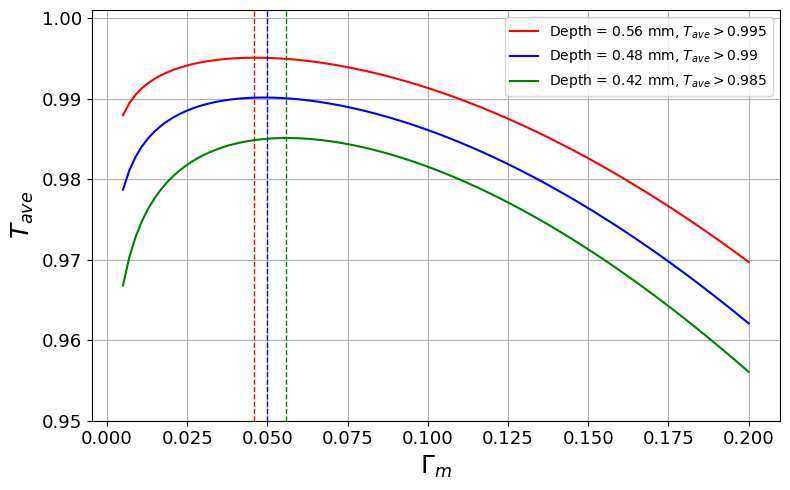

In [114]:
trans_thre = np.array([0.995,0.99,0.985])

dir_name = 'SWS_design'
save_plot_name = 'Traurus_tave_gamma_opt1'

band = np.array([220, 440])*1e+9
ind = np.where((freq>=band[0]) & (freq<=band[1]))
t_ave = np.mean(trans_arr[:,:,ind[0]],axis = 2)

opt_h, opt_g, opt_ind = lib.Plot_find_gamma(trans_thre,Gammao,t_ave,harr,dir_name,save_plot_name)

opt_trans = trans_arr[int(opt_ind[0][0]),int(opt_ind[0][1])]


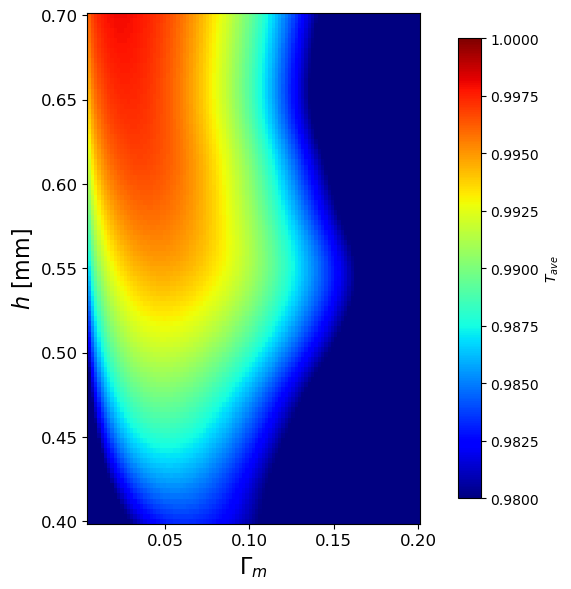

In [115]:
band = np.array([220, 440])*1e+9
ind = np.where((freq>=band[0]) & (freq<=band[1]))
t_ave = np.mean(trans_arr[:,:,ind[0]],axis = 2)

fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.tick_params(labelsize = 12)

cmap1 = ax1.pcolormesh(Gammao,harr,t_ave,vmin = 0.98,vmax = 1.0,cmap = 'jet')
fs = 16
ax1.set_ylabel('$h$ [mm]',fontsize = fs)
ax1.set_xlabel('$\Gamma_m$',fontsize = fs)

fig.colorbar(cmap1,ax = ax1,shrink=0.9, label = r'$T_{ave}$')
fig.tight_layout()
plt.show()
plt.close()

Top width= [mm] 0.09352865508069558


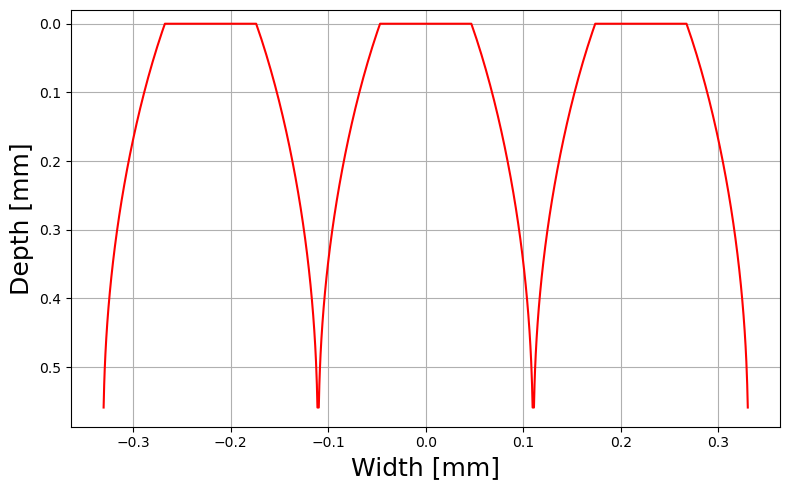

In [116]:
vc = (freq[0]+freq[-1])/2
opt_n_arr,opt_z_arr,opt_space = lib.Klopfenstein(opt_h[0],num,n0,input_n,opt_g[0])
opt_w_arr, opt_d_arr,top_width = lib.Find_width(vc,n0,input_n,P,opt_n_arr,opt_z_arr)

fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Width [mm]',fontsize = 18)
ax.set_ylabel('Depth [mm]',fontsize = 18)
ax.set_ylim(np.max(opt_d_arr)*1.05,-0.02)
ax.grid()
ax.plot(opt_w_arr,opt_d_arr,'r-')
fig.tight_layout()
plt.savefig(dir_name+'/' + 'Taurus_cross_section.png',dpi = 300)

np.savez(dir_name+'/'+'Taurus_design_sum.npz',
    freq = freq, 
    band = band, 
    trans = trans_arr, 
    trans_vae = t_ave, 
    opt_h = opt_h, 
    opt_g = opt_g, 
    opt_ind = opt_ind,
    opt_trans = opt_trans,
    opt_n_arr = opt_n_arr,
    opt_z_arr = opt_z_arr,
    opt_w_arr = opt_w_arr,
    opt_d_arr = opt_d_arr,
    pitch = P,
    top_width = top_width)

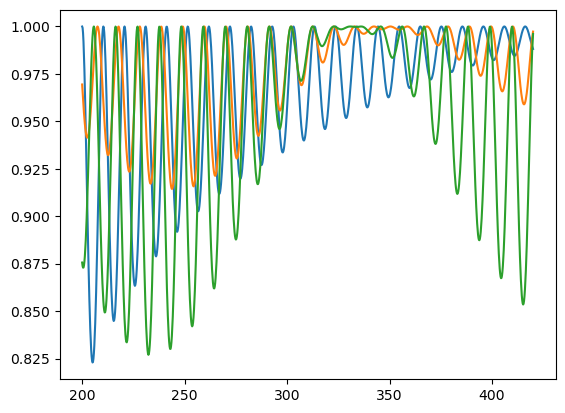

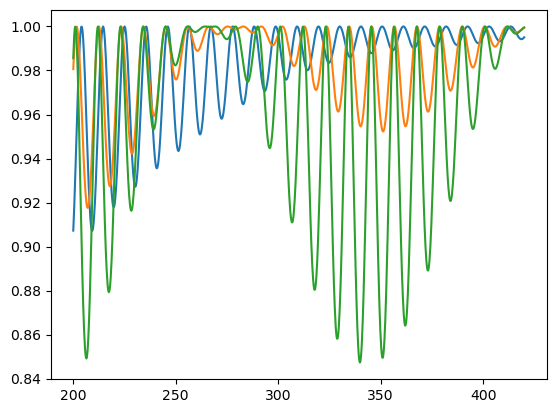

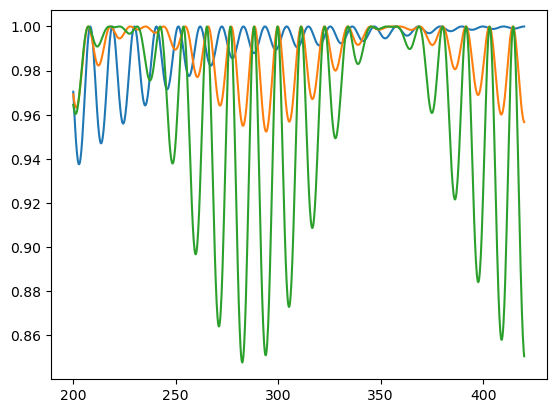

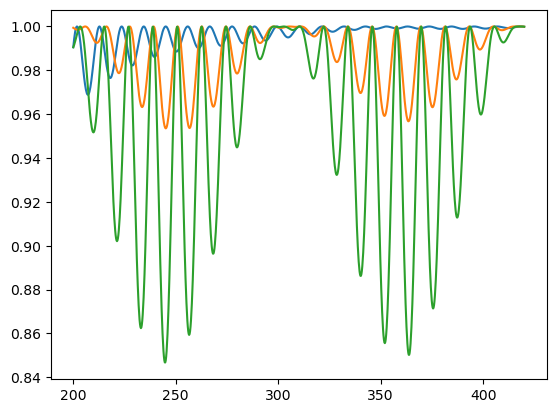

In [9]:
for hi in range(0,len(trans_arr)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for gi in range(0,len(trans_arr[hi])):
        ax.plot(freq*1e-9,trans_arr[hi,gi])


# Maximally-flat method
## Calculate refractive index and thickness of each layer
This time, I put the example of two layer ARC

In [9]:
# Center frequency [Hz]
vc = (freq[0]+freq[-1])/2

# refractive index and thickness [m]
n_single, n_two, n_three, d_single, d_two, d_three = lib.Design_multi_layer(n0,input_n,vc)
n_select, d_select = n_two,d_two

# Initial offset for two layer ARC
n_offset = np.array([-0.5,0.5])

# flanck angle threshold
f_ang_thre = 82

# Gamma
gamma_arr = lib.Find_maximum_gamma(vc,n0,input_n,P,f_ang_thre,n_select,d_select,n_offset)


In [24]:

noff_1 = np.arange(-1.0,0,0.1)
noff_2 = np.arange(0,1.0,0.1)

t_arr = np.empty((len(noff_1),len(noff_2),len(freq)))


In [32]:
for i in range(0,len(noff_1)):
    print('No.{0}/{1}'.format(i+1,len(noff_1)))
    for j in tqdm(range(0,len(noff_2)),desc = 'Offset second layer'):
        n_off_arr = np.array([-0.0-i*0.01,0.0+j*0.01])

        klop1 = lib.Klopfenstein(d_select[0],num,n0,input_n,gamma_arr[0])
        klop2 = lib.Klopfenstein(d_select[1],num,n0,input_n,gamma_arr[1])

        # Calculate transmittance
        n_arr = np.concatenate((klop1[0]+noff_1[i],klop2[0]+noff_2[j]))
        z_arr = np.concatenate((klop1[1],klop2[1]+klop1[1][-1]))
        z_space = np.concatenate((klop1[2],klop2[2]))

        t_klop = lib.Calculate_transmittance_multilayer_bothsides(freq,n_arr,z_space,n0,input_n,d,input_losstan,angle_i,incpol)
        #print(t_klop.shape)
        t_arr[i,j] = abs(t_klop[2])**2
print('Done.')

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Calculation done.


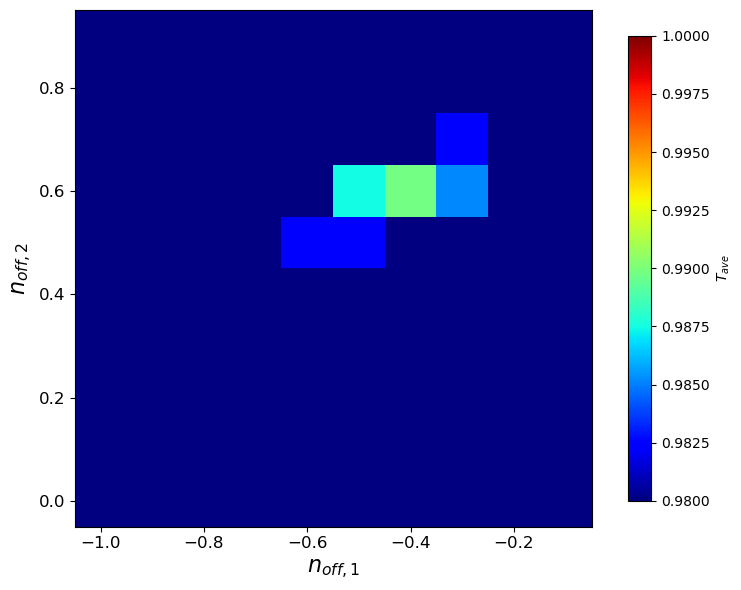

In [47]:
t_ave = np.mean(t_arr,axis = 2)

fig = plt.figure(figsize = (8,6))
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
ax1.tick_params(labelsize = 12)

cmap1 = ax1.pcolormesh(noff_1,noff_2,t_ave,vmin = 0.98,vmax = 1.0,cmap = 'jet')
fs = 16
ax1.set_xlabel('$n_{off, 1}$',fontsize = fs)
ax1.set_ylabel('$n_{off, 2}$',fontsize = fs)

fig.colorbar(cmap1,ax = ax1,shrink=0.9, label = r'$T_{ave}$')
fig.tight_layout()
plt.show()
plt.close()